# Probability density functions

In the previous chapter, we modeled empirical distributions with theoretical distributions including the binomial, Poisson, exponential, and normal distributions.

The binomial and Poisson distributions are **discrete**, which means that the outcomes have to be distinct or separate elements, like an integer number of hits and misses, or goal scored.
In a discrete distribution, each outcome is associated with a probability mass.

The exponential and normal distribution are **continuous** which means the outcomes can be locations on a spectrum -- like a wavelength -- or ratios -- like height and weight, which are ratios relative to their units of measure.
In a discrete distribution, each outcome is associated with a **probability density**.
To understand probability density, let's start by comparing distributions.

In [1]:
%load_ext nb_black
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [2]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/thinkstats.py")

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from thinkstats import decorate

<IPython.core.display.Javascript object>

## Comparing Distributions

In the previous chapter, when we compared discrete distributions, we used a bar plot to show their probability mass functions (PMFs).
When we compared continuous distributions, we used a line plot to show their cumulative distribution functions (CDFs).

For the discrete distributions, we could also have used CDFs.
For example, here's the PMF of a Poisson distribution with parameter `lam=2.2`, which is a good model for the distribution of household size in the NSFG.

In [4]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemResp.dat.gz")

<IPython.core.display.Javascript object>

In [5]:
from nsfg import read_fem_resp

resp = read_fem_resp()
older = resp.query("age >= 25")
num_family = older["numfmhh"]

<IPython.core.display.Javascript object>

In [6]:
from empiricaldist import Pmf

pmf_family = Pmf.from_seq(num_family, name="data")

<IPython.core.display.Javascript object>

In [7]:
from thinkstats import poisson_pmf

lam = 2.2
ks = np.arange(11)
ps = poisson_pmf(ks, lam)

<IPython.core.display.Javascript object>

In [8]:
pmf_poisson = Pmf(ps, ks, name="Poisson model")

<IPython.core.display.Javascript object>

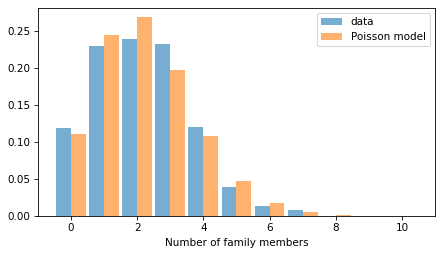

<IPython.core.display.Javascript object>

In [9]:
from thinkstats import two_bar_plots

two_bar_plots(pmf_family, pmf_poisson)
decorate(xlabel="Number of family members")

Comparing the PMFs, we can see where the data deviates from the model.
But PMFs tend to emphasize small differences that might be due to random variation.
Sometimes we can see the big picture more clearly by comparing CDFs.

For example, here's the CDF of family size compared to the CDF of the Poisson model.

In [10]:
cdf_family = pmf_family.make_cdf()
cdf_poisson = pmf_poisson.make_cdf()

<IPython.core.display.Javascript object>

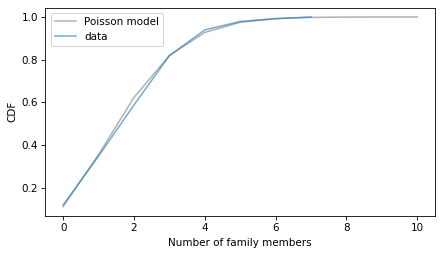

<IPython.core.display.Javascript object>

In [11]:
from thinkstats import two_cdf_plots

two_cdf_plots(cdf_poisson, cdf_family)
decorate(xlabel="Number of family members")

In my opinion, CDFs are usually the best way to compare data to a model, or compare data from different groups, etc.

Also, CDFs work well with continuous data.

In [12]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dat.gz")

<IPython.core.display.Javascript object>

In [13]:
from nsfg import read_fem_preg

preg = read_fem_preg()
birth_weights = preg["totalwgt_lb"].dropna()

<IPython.core.display.Javascript object>

In [14]:
from scipy.stats import trimboth

trimmed = trimboth(birth_weights, 0.01)

<IPython.core.display.Javascript object>

In [15]:
from thinkstats import make_normal_model

cdf_model = make_normal_model(trimmed)

<IPython.core.display.Javascript object>

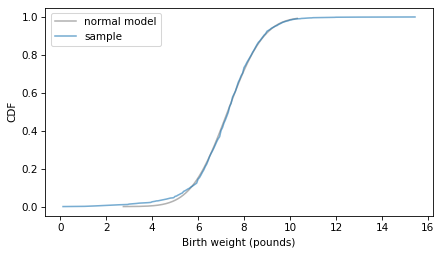

<IPython.core.display.Javascript object>

In [16]:
from empiricaldist import Cdf

cdf_birth_weight = Cdf.from_seq(birth_weights, name="sample")
two_cdf_plots(cdf_model, cdf_birth_weight, xlabel="Birth weight (pounds)")

## Probability Density

The familiar bell curve is actually the probability density function (PDF) of the normal distribution, which we can compute like this.

In [17]:
def normal_pdf(xs, mu, sigma):
    """Evaluates the normal probability density function.

    xs: float or sequence of floats
    mu: mean of the distribution
    sigma: standard deviation of the distribution

    returns: float or NumPy array of probability density
    """
    z = (xs - mu) / sigma
    return np.exp(-(z**2) / 2) / sigma / np.sqrt(2 * np.pi)

<IPython.core.display.Javascript object>

`thinkstats` provides a `NormalPdf` object that represents the PDF of a normal distribution.
We can use it to create a `NormalPdf` with the same mean and standard deviation as the birth weights in the NSFG dataset.

In [18]:
from thinkstats import NormalPdf

m, s = np.mean(trimmed), np.std(trimmed)
pdf_model = NormalPdf(m, s, name="normal model")
pdf_model

NormalPdf(7.280883100022579, 1.2430657948614345, name='normal model')

<IPython.core.display.Javascript object>

If we call the `NormalPdf` object as a function, it evaluates the normal PDF.

In [19]:
low = m - 3.5 * s
high = m + 3.5 * s
qs = np.linspace(low, high, 201)
ps = pdf_model(qs)

<IPython.core.display.Javascript object>

The result looks like a bell curve.

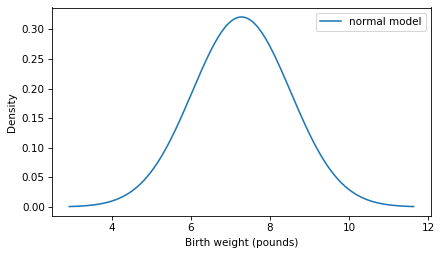

<IPython.core.display.Javascript object>

In [20]:
plt.plot(qs, ps, label="normal model")
decorate(xlabel="Birth weight (pounds)", ylabel="Density")

The `PdfNormal` object provides a `plot` function that does the same thing.

The peak of the distribution is at `m`.
If we evaluate the PDF there, the result is a probability density.

In [21]:
pdf_model(m)

0.32093416297880123

<IPython.core.display.Javascript object>

By itself, a probability density doesn't mean much -- most importantly, it is *not* a probability.
It would be incorrect to say that the probability is 32% that a randomly-chosen birth weight equals `m`.
In fact, the probability that a birth weight is truly, exactly, and precisely equal to `m` -- or any other specific value -- is effectively zero.

However, we can use these probability densities to compute the probability that a birth weight falls in an interval between two values, by computing the area under the curve.
The following function takes a `NormalPdf` object and the bounds of an interval, `low` and `high`.
It evaluates the normal PDF at equally-spaced quantities between `low` and `high`, and uses Simpson's method to estimate the area under the curve.

In [22]:
from scipy.integrate import simpson


def area_under(pdf, low, high):
    qs = np.linspace(low, high, 501)
    ps = pdf(qs)
    return simpson(y=ps, x=qs)

<IPython.core.display.Javascript object>

If we compute the area under the curve from the lowest to the highest point in the graph, the result is close to 1.

In [23]:
area_under(pdf_model, 3, 12)

0.999639791157586

<IPython.core.display.Javascript object>

If we extend the interval from negative infinity to positive infinity, the total area is exactly 1.

If we start from 0 -- or any value far below the mean -- we can compute the fraction of birth weights less than or equal to 8.5 pounds.

In [24]:
area_under(pdf_model, 0, 8.5)

0.8366380335513807

<IPython.core.display.Javascript object>

You might recall that the "fraction less than or equal to a given value" is the definition of the CDF.
So we could compute the same result using the CDF of the normal distribution.

In [25]:
from scipy.stats import norm

norm.cdf(8.5, m, s)

0.8366380358092718

<IPython.core.display.Javascript object>

Similarly, we can use the area under the density curve to compute the fraction of birth weights between 6 and 8 pounds.

In [26]:
area_under(pdf_model, 6, 8)

0.5671317752927691

<IPython.core.display.Javascript object>

Or we can get the same result using the CDF to compute the fraction less than 8 and then subtracting off the fraction less than 6. 

In [27]:
norm.cdf(8, m, s) - norm.cdf(6, m, s)

0.5671317752921801

<IPython.core.display.Javascript object>

So the CDF is the area under the curve of the PDF.
If you know calculus, another way to say the same thing is that the CDF is the integral of the PDF.
And conversely, the PDF is the derivative of the CDF.

## The Exponential PDF

To get your head around probability density, it might help to look at another example.
In the previous chapter, we used an exponential distribution to model the time until the first goal in a hockey game.
We used the following function to compute the exponential CDF.

In [28]:
def exponential_cdf(x, lam):
    """Compute the exponential CDF.

    x: float or sequence of floats
    lam: rate parameter

    returns: float or NumPy array of cumulative probability
    """
    return 1 - np.exp(-lam * x)

<IPython.core.display.Javascript object>

Where `lam` is the rate parameter in goals per unit of time.
We can compute the exponential PDF like this.


In [29]:
def exponential_pdf(x, lam):
    """Evaluates the exponential PDF.

    x: float or sequence of floats
    lam: rate parameter

    returns: float or NumPy array of probability density
    """
    return lam * np.exp(-lam * x)

<IPython.core.display.Javascript object>

`thinkstats` provides an `ExponentialPdf` object that uses this function to compute the exponential PDF.
We can use one to represent an exponential distribution with rate parameter 6 goals per game.

In [30]:
from thinkstats import ExponentialPdf

lam = 6
pdf_expo = ExponentialPdf(lam, name="model")
pdf_expo

ExponentialPdf(6, name='model')

<IPython.core.display.Javascript object>

`ExponentialPdf` provides a `plot` function we can use to plot the PDF -- notice that the unit of time is games here, rather than seconds as in the previous chapter.

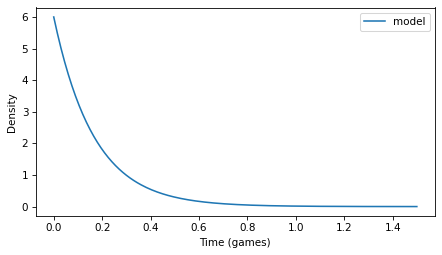

<IPython.core.display.Javascript object>

In [31]:
qs = np.linspace(0, 1.5, 201)
pdf_expo.plot(qs)
decorate(xlabel="Time (games)", ylabel="Density")

Looking at the y-axis, you might notice that some of these densities are greater than 1, which is a reminder that a probability density is not a probability.
But the area under a density curve is a probability, so it should never be greater than 1.

If we compute the area under this curve from 0 to 1.5 games, we can confirm that the result is close to 1.

In [32]:
area_under(pdf_expo, 0, 1.5)

0.999876590779019

<IPython.core.display.Javascript object>

If we extend the interval much farther, the result is slightly great than 1, but that's because we're approximating the area numerically.
Mathematically, it is exactly 1, as we can confirm using the exponential CDF.

In [33]:
from thinkstats import exponential_cdf

exponential_cdf(7, lam)

1.0

<IPython.core.display.Javascript object>

We can use the area under the density curve to compute the probability of a goal during any interval.
For example, here is the probability of a goal during the first minute of a 60-minute game.

In [34]:
area_under(pdf_expo, 0, 1 / 60)

0.09516258196404043

<IPython.core.display.Javascript object>

We can compute the same result using the exponential CDF.

In [35]:
exponential_cdf(1 / 60, lam)

0.09516258196404048

<IPython.core.display.Javascript object>

Exercise: What's the probability that the first goal is in the second period?

## Comparing PMFs and PDFs

It is a common error to compare the PMF of a sample with the PDF of a theoretical model.
For example, suppose we want to compare the distribution of birth weights to a normal model.
Here's a `Pmf` that represents the distribution of the data.

In [36]:
pmf_birth_weight = Pmf.from_seq(birth_weights, name="data")

<IPython.core.display.Javascript object>

And we already have `pdf_model`, which represents the PDF of the normal distribution with the same mean and standard deviation.
Here's what happens if we plot them on the same axis.

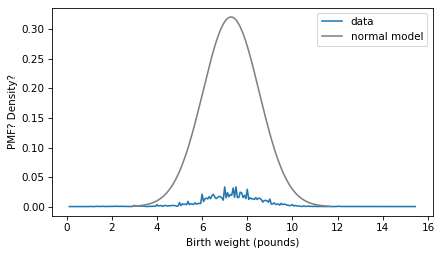

<IPython.core.display.Javascript object>

In [37]:
pmf_birth_weight.plot()
pdf_model.plot(color="gray")

decorate(xlabel="Birth weight (pounds)", ylabel="PMF? Density?")

It doesn't work very well.
One reason is that they are not in the same units.
A `Pmf` contains probability masses and a `NormalPdf` contains probability densities, so we can't compare them, and we shouldn't plot them on the same axes.

As a first attempt to solve the problem, we can make a `Pmf` that approximates the normal distribution by evaluating the PDF at a discrete set of points.
`NormalPdf` provides a `make_pmf` method that does that.

In [38]:
pmf_model = pdf_model.make_pmf()

<IPython.core.display.Javascript object>

The result contain probability masses, so we can at least plot it on the same axes as the PMF of the data.

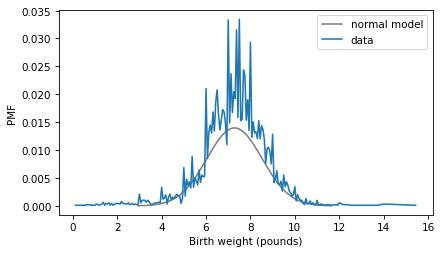

<IPython.core.display.Javascript object>

In [39]:
pmf_model.plot(color="gray")
pmf_birth_weight.plot()

decorate(xlabel="Birth weight (pounds)", ylabel="PMF")

But this is still not a good way to compare distributions.
One problem is that the two `Pmf` objects contains different numbers of quantities, and the quantities in `pmf_birth_weight` are not equally spaced, so the probability masses are not really comparable.

In [40]:
len(pmf_model), len(pmf_birth_weight)

(201, 184)

<IPython.core.display.Javascript object>

The other problem is that the `Pmf` of the data is noisy.

## Kernel Density Estimation

So let's try something else -- instead of converting the model to a PMF, we can convert the distribution of the data to a PDF.
To show how that works, I'll start with a small sample of the data.

In [41]:
np.random.seed(3)

n = 10
sample = birth_weights.sample(n)

<IPython.core.display.Javascript object>

The `Pmf` of this sample looks like this.

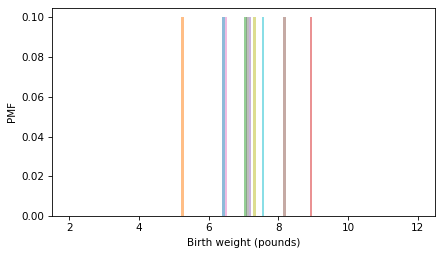

<IPython.core.display.Javascript object>

In [63]:
for weight in sample:
    pmf = Pmf.from_seq([weight]) / n
    pmf.bar(width=0.08, alpha=0.5)

xlim = [1.5, 12.5]
decorate(xlabel="Birth weight (pounds)", ylabel="PMF", xlim=xlim)

This way of representing the distribution treats the data as if it is discrete, so each probability mass is stacked up on a single point.
But birth weight is actually a continuous quantity, so the quantities between the measurements are also possible.
We can represent that possibility by replacing each discrete probability mass with a continuous probability density, like this.

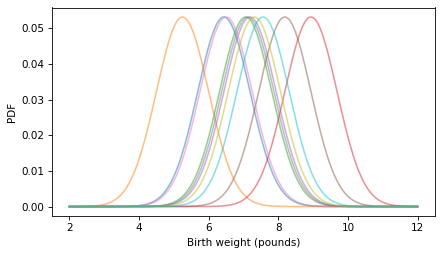

<IPython.core.display.Javascript object>

In [64]:
qs = np.linspace(2, 12, 201)

for weight in sample:
    ps = NormalPdf(weight, 0.75)(qs) / n
    plt.plot(qs, ps, alpha=0.5)

decorate(xlabel="Birth weight (pounds)", ylabel="PDF", xlim=xlim)

For each weight in the sample, we create a `NormalPdf` with the observed weight as the mean -- now let's add them up.

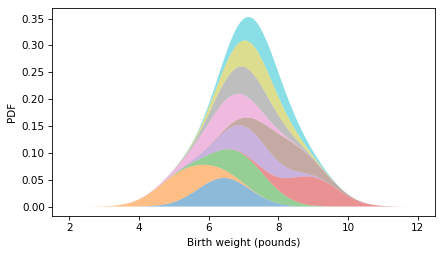

<IPython.core.display.Javascript object>

In [65]:
low_ps = np.zeros_like(qs)

for weight in sample:
    ps = NormalPdf(weight, 0.75)(qs) / n
    high_ps = low_ps + ps
    plt.fill_between(qs, low_ps, high_ps, alpha=0.5, lw=0)
    low_ps = high_ps

decorate(xlabel="Birth weight (pounds)", ylabel="PDF", xlim=xlim)

When we add up the probability densities for each data point, the result is an estimate of the probability density for the whole sample.
This process is called **kernel density estimation** or KDE.
In this context, a "kernel" is one of the small density functions we added up.
Because the kernels we used are normal distributions -- also known as Gaussians -- we could say more specifically that we computed a Gaussian KDE.

SciPy provides a function called `gaussian_kde` that implements this algorithm.
Here's how we can use it to estimate the distribution of birth weights.

In [71]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(birth_weights)

<IPython.core.display.Javascript object>

The result is an object that represents the estimated PDF, which we can evaluate by calling it like  a function.

In [72]:
ps = kde(qs)

<IPython.core.display.Javascript object>

Here's what the result looks like.

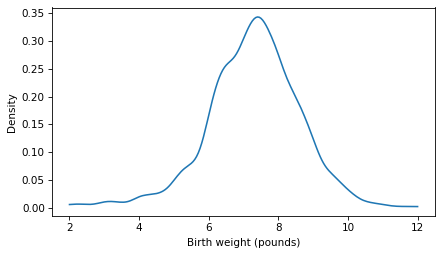

<IPython.core.display.Javascript object>

In [73]:
plt.plot(qs, ps)

decorate(xlabel="Birth weight (pounds)", ylabel="Density")

`thinkstats` provides an `EstimatedPdf` object that uses Gaussian KDE to estimate the distribution of a sample, and provides the same methods as `NormalPdf` and `ExponentialPdf`.
Here's how we make one.

In [77]:
from thinkstats import EstimatedPdf

kde_birth_weights = EstimatedPdf(birth_weights, name="data")

<IPython.core.display.Javascript object>

And now, finally, we can compare the estimated PDF of the sample to the PDF of a normal distribution.

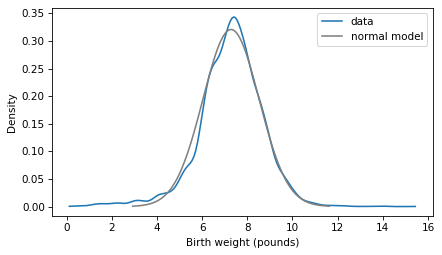

<IPython.core.display.Javascript object>

In [79]:
kde_birth_weights.plot()
pdf_model.plot(color="gray")

decorate(xlabel="Birth weight (pounds)", ylabel="Density")

KDE makes it possible to compare the distribution of a dataset to a theoretical model, and for some audiences, this is a good way to visualize the comparison.
But for continuous quantities, I think it's usually better to compare CDFs.

## The distribution framework

At this point we have a complete set of ways to represent a distribution: PMFs, CDFs and PDFs
The following figure shows how these functions relate to each other.

<img width="400" src="https://github.com/AllenDowney/ThinkStats/raw/v3/figs/distribution_framework.png">


To show how these objects work together, we'll load a new dataset that "contains the time of birth, sex, and birth weight for each of 44 babies born in one 24-hour period at a Brisbane, Australia, hospital. Also included is the number of minutes since midnight for
each birth."

`thinkstats` provides a function that reads the data and returns a `DataFrame`.

In [82]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/babyboom.dat")

<IPython.core.display.Javascript object>

In [150]:
from thinkstats import read_baby_boom

boom = read_baby_boom()
boom.head()

,time,sex,weight_g,minutes
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177


<IPython.core.display.Javascript object>

We can use the `minutes` column to compute the time in minutes between each successive birth.

In [100]:
diffs = boom["minutes"].diff().dropna()

<IPython.core.display.Javascript object>

If birth happen at random, with equal probability during any minute of the day, we expect these intervals to follow an exponential distribution.
In reality, that assumption is not precisely true, but the exponential distribution might still be a good model for the data.

To find out, we'll start by making a `Pmf` that represents the distribution of intervals.

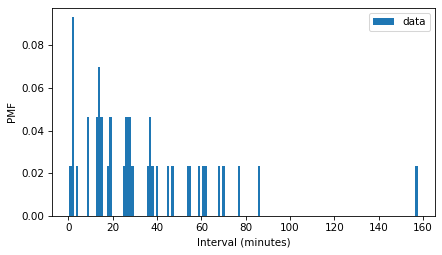

<IPython.core.display.Javascript object>

In [110]:
pmf_diffs = Pmf.from_seq(diffs, name="data")
pmf_diffs.bar(width=1)

decorate(xlabel="Interval (minutes)", ylabel="PMF")

The `make_cdf` method computes the cumulative sum of the probabilities in the `Pmf` and returns a `Cdf` object. 

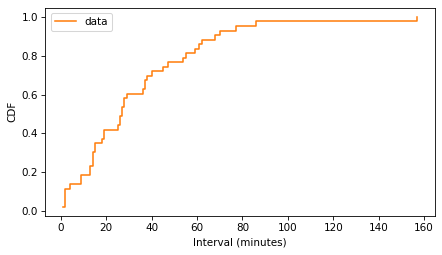

<IPython.core.display.Javascript object>

In [126]:
cdf_diffs = pmf_diffs.make_cdf()
cdf_diffs.step(color="C1")

decorate(xlabel="Interval (minutes)", ylabel="CDF")

The `Pmf` and `Cdf` are equivalent in the sense that if we are given either one, we can compute the other.
To demonstrate, we'll use the `make_pmf` method, which computes the differences between successive probabilities in a `Cdf` and returns a `Pmf`.

In [154]:
pmf_diffs2 = cdf_diffs.make_pmf()

<IPython.core.display.Javascript object>

The result should be identical to the original `Pmf`, but there might be small floating-point errors.
We can use `allclose` to check that the result is close to the original `Pmf`.

In [155]:
np.allclose(pmf_diffs, pmf_diffs2)

True

<IPython.core.display.Javascript object>

From a `Pmf`, we can use KDE to estimate a density function.

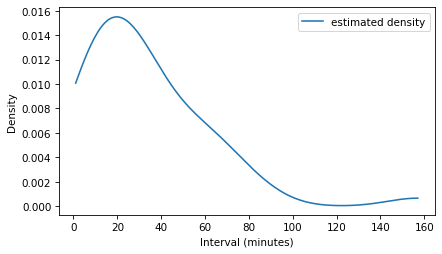

<IPython.core.display.Javascript object>

In [117]:
kde_diffs = EstimatedPdf(diffs, name="estimated density")

kde_diffs.plot()
decorate(xlabel="Interval (minutes)", ylabel="Density")

To see whether the estimated density follows an exponential model, we can make an `ExponentialPdf` with the same mean as the data.

In [156]:
m = diffs.mean()
lam = 1 / m
pdf_model = ExponentialPdf(lam, name="exponential PDF")

<IPython.core.display.Javascript object>

Here's what it looks like compared to the estimated density.

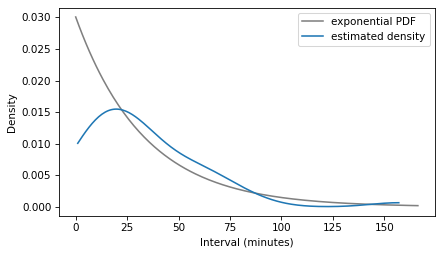

<IPython.core.display.Javascript object>

In [157]:
pdf_model.plot(color="gray")
kde_diffs.plot()
decorate(xlabel="Interval (minutes)", ylabel="Density")

Comparing the estimated density to an exponential PDF, it doesn't seem like the data fit the model well.
But that might be misleading -- again, I think comparing CDFs provides the clearer picture.

Here's the CDF of an exponential distribution compared to the CDF of the data.

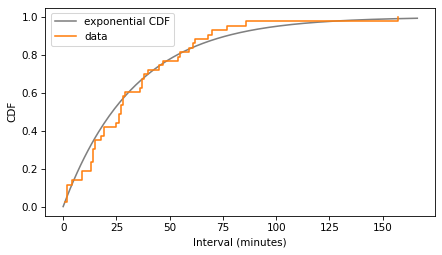

<IPython.core.display.Javascript object>

In [125]:
from thinkstats import ExponentialCdf

cdf_model = ExponentialCdf(lam, name="exponential CDF")
cdf_model.plot(color="gray")
cdf_diffs.step(color="C1")

decorate(xlabel="Interval (minutes)", ylabel="CDF")

The exponential CDF fits the data well.

Given an `ExponentialPdf`, we can use `make_pmf` to make a discrete approximation of the exponential PDF.

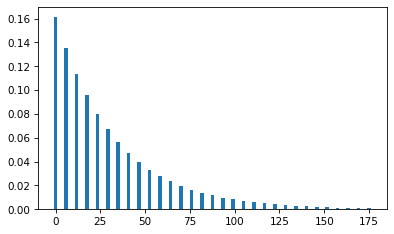

<IPython.core.display.Javascript object>

In [148]:
qs = np.linspace(0, 175, 31)
pmf_model = pdf_model.make_pmf(qs)
pmf_model.bar(width=2)

decorate(xlabel="Interval (minutes)", ylabel="PMF")

And given an `ExponentialCdf`, we can use `make_cdf` to make a discrete approximation of the exponential CDF.

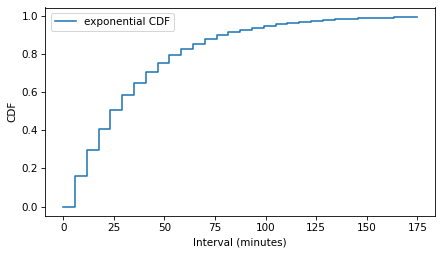

<IPython.core.display.Javascript object>

In [160]:
discrete_cdf_model = cdf_model.make_cdf(qs)
discrete_cdf_model.step()

decorate(xlabel="Interval (minutes)", ylabel="CDF")

Finally, to get from a discrete CDF to a continuous CDF, we can interpolate between the steps, which is what we see if we use the `plot` method instead of the `step` method.

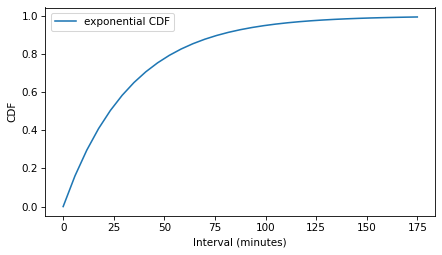

<IPython.core.display.Javascript object>

In [161]:
discrete_cdf_model.plot()

decorate(xlabel="Interval (minutes)", ylabel="CDF")

We started with PMFs, which represent the probabilities for a discrete set of values.
To get from a PMF to a CDF, you add up the probability masses to get cumulative probabilities.
To get from a CDF back to a PMF, you compute differences in cumulative probabilities.
We'll see the implementation of these operations in the next few sections.

A PDF is the derivative of a continuous CDF; or, equivalently, a CDF is the integral of a PDF.
Remember that a PDF maps from values to probability densities; to get a probability, you have to integrate.

To get from a discrete to a continuous distribution, you can perform various kinds of smoothing.
One form of smoothing is to assume that the data come from an analytic continuous distribution (like exponential or normal) and to estimate the parameters of that distribution.
Another option is kernel density estimation.

The opposite of smoothing is **discretizing**, or quantizing.
If you evaluate a PDF at discrete points, you can generate a PMF that is an approximation of the PDF.
You can get a better approximation using numerical integration.

To distinguish between continuous and discrete CDFs, it might be better for a discrete CDF to be a "cumulative mass function," but as far as I can tell no one uses that term.

## Hist implementation

At this point you should know how to use the basic types provided by `thinkstats2`: Hist, `Pmf`, `Cdf`, and Pdf.
The next few sections provide details about how they are implemented.
This material might help you use these classes more effectively, but it is not strictly necessary.

Hist and `Pmf` inherit from a parent class called `_DictWrapper`.
The leading underscore indicates that this class is "internal;" that is, it should not be used by code in other modules.
The name indicates what it is: a dictionary wrapper.
Its primary attribute is `d`, the dictionary that maps from values to their frequencies.

The values can be any hashable type.
The frequencies should be integers, but can be any numeric type.

`_DictWrapper` contains methods appropriate for both `Hist` and `Pmf`, including `__init__`, `values`, `items` and `render`.
It also provides modifier methods `set`, `incr`, `mult`, and `remove`.
These methods are all implemented with dictionary operations.
For example:

In [ ]:
# TODO: Show implementation?

`Hist` also provides `freq`, which looks up the frequency of a given value.

Because `Hist` operators and methods are based on dictionaries, these methods are constant time operations; that is, their run time does not increase as the Hist gets bigger.

## `Pmf` implementation

`Pmf` and Hist are almost the same thing, except that a `Pmf` maps values to floating-point probabilities, rather than integer frequencies.
If the sum of the probabilities is 1, the `Pmf` is normalized.

`Pmf` provides `Normalize`, which computes the sum of the probabilities and divides through by a factor:

In [ ]:
def normalize(self, fraction=1.0):
    total = self.total()
    if total == 0.0:
        raise ValueError("Total probability is zero.")

    factor = fraction / total
    for x in self.d:
        self.d[x] *= factor
    return total

`fraction` determines the sum of the probabilities after normalizing; the default value is 1. If the total probability is 0, the `Pmf` cannot be normalized, so `Normalize` raises `ValueError`.

Hist and `Pmf` have the same constructor.
It can take as an argument a `dict`, Hist, `Pmf` or `Cdf`, a Pandas `Series`, a list of (value, frequency) pairs, or a sequence of values.

If you instantiate a `Pmf`, the result is normalized.
If you instantiate a Hist, it is not.
To construct an unnormalized `Pmf`, you can create an empty `Pmf` and modify it. The `Pmf` modifiers do not renormalize the `Pmf`.

## `Cdf` implementation

A CDF maps from values to cumulative probabilities, so I could have implemented `Cdf` as a `_DictWrapper`.
But the values in a CDF are ordered and the values in a `_DictWrapper` are not.
Also, it is often useful to compute the inverse CDF; that is, the map from cumulative probability to value.
So the implementation I chose is two sorted lists.
That way I can use binary search to do a forward or inverse lookup in logarithmic time.

The `Cdf` constructor can take as a parameter a sequence of values or a Pandas `Series`, a dictionary that maps from values to probabilities, a sequence of (value, probability) pairs, a Hist, `Pmf`, or `Cdf`.
Or if it is given two parameters, it treats them as a sorted sequence of values and the sequence of corresponding cumulative probabilities.

Given a sequence, Pandas `Series`, or dictionary, the constructor makes a Hist.
Then it uses the Hist to initialize the attributes:

`xs` is the sorted list of values; `freqs` is the list of corresponding frequencies.
`np.cumsum` computes the cumulative sum of the frequencies.
Dividing through by the total frequency yields cumulative probabilities.
For `n` values, the time to construct the `Cdf` is proportional to $n \log n$.

Here is the implementation of `Prob`, which takes a value and returns its cumulative probability:

In [ ]:
def prob(self, x):
    if x < self.xs[0]:
        return 0.0
    index = bisect.bisect(self.xs, x)
    p = self.ps[index - 1]
    return p

The `bisect` module provides an implementation of binary search.
And here is the implementation of `Value`, which takes a cumulative probability and returns the corresponding value:

In [ ]:
def value(self, p):
    if p < 0 or p > 1:
        raise ValueError("p must be in range [0, 1]")
    index = bisect.bisect_left(self.ps, p)
    return self.xs[index]

Given a `Cdf`, we can compute the `Pmf` by computing differences between consecutive cumulative probabilities.
If you call the `Cdf` constructor and pass a `Pmf`, it computes differences by calling `Cdf.Items`:

In [ ]:
def items(self):
    a = self.ps
    b = np.roll(a, 1)
    b[0] = 0
    return zip(self.xs, a - b)

`np.roll` shifts the elements of `a` to the right, and "rolls" the last one back to the beginning.
We replace the first element of `b` with 0 and then compute the difference `a-b`.
The result is a NumPy array of probabilities.

`Cdf` provides `shift` and `scale`, which modify the values in the `Cdf`, but the probabilities should be treated as immutable.

## NSFG

In [ ]:
import nsfg

live, firsts, others = nsfg.make_frames()

The following figure shows the result.
The left tail appears longer than the right, so we suspect the distribution is skewed left.
The mean, 7.27 lbs, is a bit less than the median, 7.38 lbs, so that is consistent with left skew.
And both skewness coefficients are negative: sample skewness is -0.59; Pearson's median skewness is -0.23.

In [ ]:
data = live.totalwgt_lb.dropna()
pdf = EstimatedPdf(data, name="birth weight")
pdf.plot()

Now let's compare this distribution to the distribution of adult weight in the BRFSS.
Again, here's the code:

In [ ]:
df = brfss.read_brfss()
data = df.wtkg2.dropna()
pdf = EstimatedPdf(data, name="adult weight")
pdf.plot()

## Glossary

-   **Probability density function (PDF)**: The derivative of a continuous CDF, a function that maps a value to its probability density.

-   **Probability density**: A quantity that can be integrated over a range of values to yield a probability.
If the values are in units of cm, for example, probability density is in units of probability per cm.

-   **Kernel density estimation (KDE)**: An algorithm that estimates a PDF based on a sample.

-   **discretize**: To approximate a continuous function or distribution with a discrete function.
The opposite of smoothing.

-   **raw moment**: A statistic based on the sum of data raised to a power.

-   **central moment**: A statistic based on deviation from the mean, raised to a power.

-   **standardized moment**: A ratio of moments that has no units.

-   **skewness**: A measure of how asymmetric a distribution is.

-   **sample skewness**: A moment-based statistic intended to quantify the skewness of a distribution.

-   **Pearson's median skewness coefficient**: A statistic intended to quantify the skewness of a distribution based on the median, mean, and standard deviation.

-   **robust**: A statistic is robust if it is relatively immune to the effect of outliers.

## Exercises

### Exercise

In [80]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/CDBRFS08.ASC.gz")

<IPython.core.display.Javascript object>

In [81]:
from thinkstats import read_brfss

df = read_brfss(nrows=None)

<IPython.core.display.Javascript object>

### Exercise

### Exercise

The distribution of income is famously skewed to the right.
In this exercise, we’ll measure how strong that skew is. The Current Population Survey (CPS) is a joint effort of the Bureau of Labor Statistics and the Census Bureau to study income and related variables.
Data collected in 2013 is available from http://www.census.gov/hhes/www/cpstables/032013/hhinc/toc.htm.
I downloaded `hinc06.xls`, which is an Excel spreadsheet with information about household income, and converted it to `hinc06.csv`, a CSV file you will find in the repository for this book.
You will also find `hinc2.py`, which reads this file and transforms the data.

The dataset is in the form of a series of income ranges and the number of respondents who fell in each range.
The lowest range includes respondents who reported annual household income “Under \$5000.” 

The highest range includes respondents who made “\$250,000 or more.”

To estimate mean and other statistics from these data, we have to make some assumptions about the lower and upper bounds, and how the values are distributed in each range.
`hinc2.py` provides `interpolate_sample`, which shows one way to model this data.
It takes a `DataFrame` with a column, `income`, that contains the upper bound of each range, and `freq`, which contains the number of respondents in each frame.

It also takes `log_upper`, which is an assumed upper bound on the highest range, expressed in `log10` dollars.
The default value, `log_upper=6.0` represents the assumption that the largest income among the respondents is $10^6$, or one million dollars.

`interpolate_sample` generates a pseudo-sample; that is, a sample of household incomes that yields the same number of respondents in each range as the actual data.
It assumes that incomes in each range are equally spaced on a `log10` scale.

In [ ]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/hinc.py")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/hinc06.csv")

In [ ]:
def interpolate_sample(df, log_upper=6.0):
    """Makes a sample of log10 household income.

    Assumes that log10 income is uniform in each range.

    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range

    returns: NumPy array of log10 household income
    """
    df["log_upper"] = np.log10(df.income)
    df["log_lower"] = df.log_upper.shift(1)
    df.loc[0, "log_lower"] = 3.0
    df.loc[41, "log_upper"] = log_upper
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        arrays.append(vals)
    log_sample = np.concatenate(arrays)
    return log_sample

In [ ]:
import hinc

income_df = hinc.read_data()

In [ ]:
# Solution

log_sample = interpolate_sample(income_df, log_upper=6.0)

In [ ]:
# Solution

log_cdf = Cdf.from_seq(log_sample)
log_cdf.plot()
decorate(xlabel="Household income (log $)", ylabel="CDF")

In [ ]:
# Solution

sample = np.power(10, log_sample)

In [ ]:
# Solution

cdf = Cdf.from_seq(sample)
cdf.plot()
decorate(xlabel="Household income ($)", ylabel="CDF")

Compute the median, mean, skewness and Pearson’s skewness of the resulting sample.
What fraction of households report a taxable income below the mean? How do the results depend on the assumed upper bound?

In [ ]:
# Solution

mean(sample), median(sample)

In [ ]:
# Solution

skewness(sample), pearson_median_skewness(sample)

In [ ]:
# Solution

cdf(mean(sample))

All of this is based on an assumption that the highest income is one million dollars, but that's certainly not correct.
What happens to the skew if the upper bound is 10 million?

Without better information about the top of this distribution, we can't say much about the skewness of the distribution.